# Data

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
from sklearn.linear_model import Ridge, LinearRegression, Lasso

In [3]:
from sklearn.model_selection import cross_val_score

In [4]:
from sklearn.datasets import load_boston
boston = load_boston()

In [5]:
boston['DESCR']

".. _boston_dataset:\n\nBoston house prices dataset\n---------------------------\n\n**Data Set Characteristics:**  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate per $10,000

In [6]:
X, y = boston.data, boston.target

In [7]:
X.shape

(506, 13)

In [8]:
y.shape

(506,)

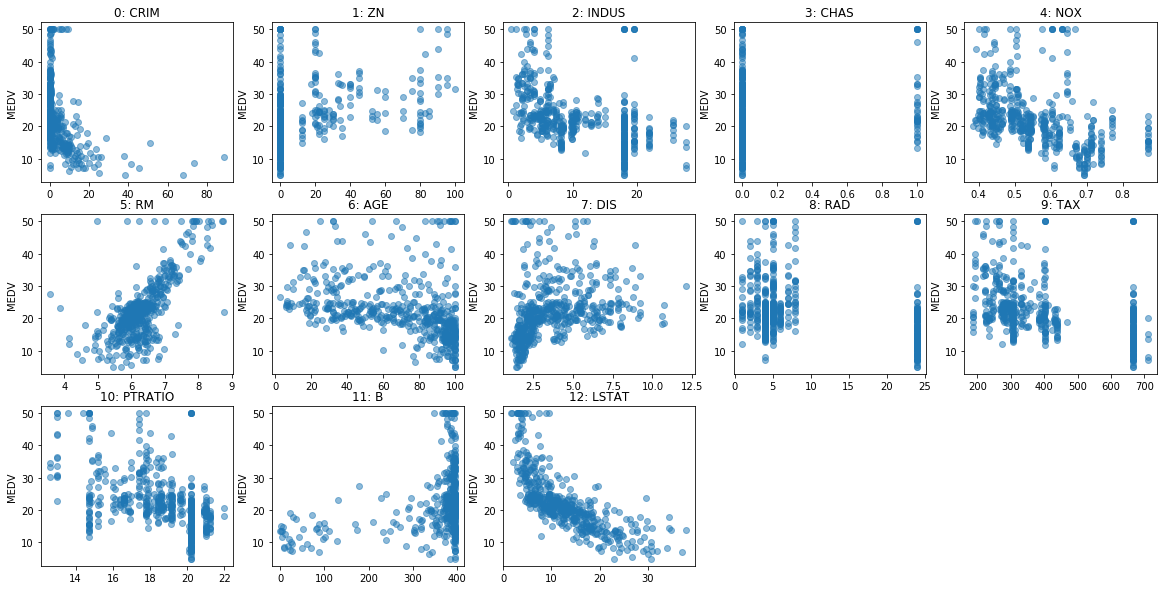

In [9]:
fig, axes = plt.subplots(3, 5, figsize=(20, 10))
for i, ax in enumerate(axes.ravel()):
    if i > 12:
        ax.set_visible(False)
        continue
    ax.plot(X[:, i], y, 'o', alpha=.5)
    ax.set_title("{}: {}".format(i, boston.feature_names[i]))
    ax.set_ylabel("MEDV")

# Ridge

## Scenario Without Polynomial Features

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [11]:
np.mean(cross_val_score(LinearRegression(), X_train, y_train, cv=10))

0.7160133196648382

In [12]:
np.mean(cross_val_score(Ridge(), X_train, y_train, cv=10))

0.7140510045941364

### Tuning the Hyperparameter

In [13]:
np.set_printoptions(suppress=True, precision=3)

In [14]:
from sklearn.model_selection import GridSearchCV
param_grid = {'alpha': np.logspace(-3, 3, 13)}
print(param_grid)

{'alpha': array([   0.001,    0.003,    0.01 ,    0.032,    0.1  ,    0.316,
          1.   ,    3.162,   10.   ,   31.623,  100.   ,  316.228,
       1000.   ])}


In [15]:
grid = GridSearchCV(Ridge(), param_grid, cv=10, return_train_score=True)
grid.fit(X_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': array([   0.001,    0.003,    0.01 ,    0.032,    0.1  ,    0.316,
          1.   ,    3.162,   10.   ,   31.623,  100.   ,  316.228,
       1000.   ])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

In [16]:
import pandas as pd
results = pd.DataFrame(grid.cv_results_)
results

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0        0.003427      0.003756         0.000729        0.000159       0.001   
1        0.001350      0.001124         0.000624        0.000271  0.00316228   
2        0.000827      0.000376         0.000596        0.000230        0.01   
3        0.000624      0.000217         0.000519        0.000136   0.0316228   
4        0.000671      0.000383         0.000491        0.000159         0.1   
5        0.000822      0.000302         0.000594        0.000110    0.316228   
6        0.000449      0.000105         0.000406        0.000094           1   
7        0.000668      0.000385         0.000499        0.000142     3.16228   
8        0.000711      0.000258         0.000540        0.000081          10   
9        0.000411      0.000035         0.000369        0.000036     31.6228   
10       0.000729      0.000276         0.000554        0.000118         100   
11       0.000688      0.000288         0.000516        0.000108     316.228   
12       0.000412      0.000052         0.000364        0.000030        1000   

                              params  split0_test_score  split1_test_score  \
0                   {'alpha': 0.001}           0.783264           0.703124   
1   {'alpha': 0.0031622776601683794}           0.783242           0.703110   
2                    {'alpha': 0.01}           0.783172           0.703064   
3     {'alpha': 0.03162277660168379}           0.782949           0.702916   
4                     {'alpha': 0.1}           0.782228           0.702439   
5     {'alpha': 0.31622776601683794}           0.779963           0.700937   
6                     {'alpha': 1.0}           0.774383           0.697210   
7      {'alpha': 3.1622776601683795}           0.766435           0.691934   
8                    {'alpha': 10.0}           0.758370           0.687116   
9      {'alpha': 31.622776601683793}           0.743153           0.679688   
10                  {'alpha': 100.0}           0.711600           0.665268   
11     {'alpha': 316.22776601683796}           0.675120           0.647667   
12                 {'alpha': 1000.0}           0.644696           0.629329   

    split2_test_score  split3_test_score  ...  split2_train_score  \
0            0.555585           0.732900  ...            0.766419   
1            0.555572           0.733042  ...            0.766419   
2            0.555533           0.733482  ...            0.766418   
3            0.555412           0.734819  ...            0.766412   
4            0.555058           0.738537  ...            0.766356   
5            0.554191           0.746729  ...            0.765964   
6            0.553171           0.757656  ...            0.764324   
7            0.555942           0.765105  ...            0.761140   
8            0.569907           0.770369  ...            0.757306   
9            0.594890           0.778256  ...            0.749432   
10           0.610189           0.785346  ...            0.730008   
11           0.598293           0.785016  ...            0.700460   
12           0.561959           0.781409  ...            0.666376   

    split3_train_score  split4_train_score  split5_train_score  \
0             0.747077            0.734746            0.752195   
1             0.747077            0.734746            0.752194   
2             0.747075            0.734745            0.752194   
3             0.747065            0.734738            0.752188   
4             0.746974            0.734677            0.752133   
5             0.746361            0.734251            0.751759   
6             0.743999            0.732518            0.750244   
7             0.739949            0.729329            0.747454   
8             0.736175            0.726073            0.744474   
9             0.730400            0.720653            0.738697   
10            0.715026            0.706527            0.722552   
11            0.688386         

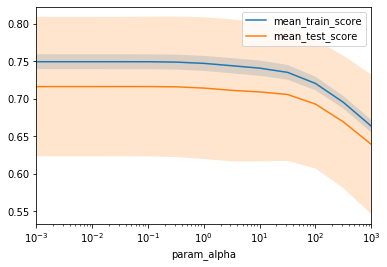

In [17]:
results.plot('param_alpha', 'mean_train_score')
results.plot('param_alpha', 'mean_test_score', ax=plt.gca())
plt.fill_between(results.param_alpha.astype(np.float),
                 results['mean_train_score'] + results['std_train_score'],
                 results['mean_train_score'] - results['std_train_score'], alpha=0.2)
plt.fill_between(results.param_alpha.astype(np.float),
                 results['mean_test_score'] + results['std_test_score'],
                 results['mean_test_score'] - results['std_test_score'], alpha=0.2)
plt.legend()
plt.xscale("log")

In [18]:
grid.best_params_

{'alpha': 0.1}

In [19]:
grid.best_score_

0.7160600746856847

## Scenario With Polynomial Features

In [20]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import make_pipeline

In [21]:
poly = PolynomialFeatures(degree=2).fit(X_train)
X_train_poly = poly.transform(X_train)
X_test_poly = poly.transform(X_test)
print("X_train.shape: {}".format(X_train.shape))
print("X_train_poly.shape: {}".format(X_train_poly.shape))

X_train.shape: (379, 13)
X_train_poly.shape: (379, 105)


In [22]:
print("Polynomial feature names:\n{}".format(poly.get_feature_names()))

Polynomial feature names:
['1', 'x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x0^2', 'x0 x1', 'x0 x2', 'x0 x3', 'x0 x4', 'x0 x5', 'x0 x6', 'x0 x7', 'x0 x8', 'x0 x9', 'x0 x10', 'x0 x11', 'x0 x12', 'x1^2', 'x1 x2', 'x1 x3', 'x1 x4', 'x1 x5', 'x1 x6', 'x1 x7', 'x1 x8', 'x1 x9', 'x1 x10', 'x1 x11', 'x1 x12', 'x2^2', 'x2 x3', 'x2 x4', 'x2 x5', 'x2 x6', 'x2 x7', 'x2 x8', 'x2 x9', 'x2 x10', 'x2 x11', 'x2 x12', 'x3^2', 'x3 x4', 'x3 x5', 'x3 x6', 'x3 x7', 'x3 x8', 'x3 x9', 'x3 x10', 'x3 x11', 'x3 x12', 'x4^2', 'x4 x5', 'x4 x6', 'x4 x7', 'x4 x8', 'x4 x9', 'x4 x10', 'x4 x11', 'x4 x12', 'x5^2', 'x5 x6', 'x5 x7', 'x5 x8', 'x5 x9', 'x5 x10', 'x5 x11', 'x5 x12', 'x6^2', 'x6 x7', 'x6 x8', 'x6 x9', 'x6 x10', 'x6 x11', 'x6 x12', 'x7^2', 'x7 x8', 'x7 x9', 'x7 x10', 'x7 x11', 'x7 x12', 'x8^2', 'x8 x9', 'x8 x10', 'x8 x11', 'x8 x12', 'x9^2', 'x9 x10', 'x9 x11', 'x9 x12', 'x10^2', 'x10 x11', 'x10 x12', 'x11^2', 'x11 x12', 'x12^2']


In [23]:
pipe = make_pipeline(StandardScaler(),Ridge())
ridge = pipe.fit(X_train, y_train)
print("Score without interactions: {:.3f}".format(
    ridge.score(X_test, y_test)))
ridge_poly = pipe.fit(X_train_poly, y_train)
print("Score with interactions: {:.3f}".format(
    ridge_poly.score(X_test_poly, y_test)))

Score without interactions: 0.684
Score with interactions: 0.829


In [24]:
np.mean(cross_val_score(pipe, X_train, y_train, cv=10))

0.7163173889175505

In [25]:
np.mean(cross_val_score(pipe, X_train_poly, y_train, cv=10))

0.8537775160100842

### Tuning the Hyperparameter

In [26]:
pipe = make_pipeline(PolynomialFeatures(degree=2),StandardScaler(),Ridge())

param_grid = {'ridge__alpha': np.logspace(-3, 3, 13)}

grid = GridSearchCV(pipe, param_grid, cv=10, return_train_score=True)
grid.fit(X_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('polynomialfeatures',
                                        PolynomialFeatures(degree=2,
                                                           include_bias=True,
                                                           interaction_only=False,
                                                           order='C')),
                                       ('standardscaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('ridge',
                                        Ridge(alpha=1.0, copy_X=True,
                                              fit_intercept=True, max_iter=None,
                                              normalize=False,
                        

In [27]:
results = pd.DataFrame(grid.cv_results_)

In [28]:
results

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        0.003593      0.001301         0.000976        0.000127   
1        0.002598      0.000528         0.000924        0.000177   
2        0.002783      0.000433         0.000950        0.000226   
3        0.002514      0.000511         0.000858        0.000160   
4        0.003864      0.003755         0.000929        0.000201   
5        0.002790      0.000581         0.000876        0.000150   
6        0.002778      0.000532         0.000864        0.000144   
7        0.002738      0.000482         0.000930        0.000170   
8        0.002632      0.000552         0.000867        0.000175   
9        0.002871      0.000674         0.000909        0.000150   
10       0.002591      0.000448         0.000910        0.000139   
11       0.002671      0.000506         0.000934        0.000135   
12       0.002582      0.000485         0.000881        0.000122   

   param_ridge__alpha                                   params  \
0               0.001                  {'ridge__alpha': 0.001}   
1          0.00316228  {'ridge__alpha': 0.0031622776601683794}   
2                0.01                   {'ridge__alpha': 0.01}   
3           0.0316228    {'ridge__alpha': 0.03162277660168379}   
4                 0.1                    {'ridge__alpha': 0.1}   
5            0.316228    {'ridge__alpha': 0.31622776601683794}   
6                   1                    {'ridge__alpha': 1.0}   
7             3.16228     {'ridge__alpha': 3.1622776601683795}   
8                  10                   {'ridge__alpha': 10.0}   
9             31.6228     {'ridge__alpha': 31.622776601683793}   
10                100                  {'ridge__alpha': 100.0}   
11            316.228     {'ridge__alpha': 316.22776601683796}   
12               1000                 {'ridge__alpha': 1000.0}   

    split0_test_score  split1_test_score  split2_test_score  \
0            0.565386           0.776911           0.820390   
1            0.571989           0.773292           0.820653   
2            0.578460           0.770931           0.822452   
3            0.594707           0.771671           0.824055   
4            0.649316           0.777374           0.813543   
5            0.759034           0.784340           0.777776   
6            0.861283           0.787713           0.722928   
7            0.895571           0.796753           0.668278   
8            0.878207           0.814819           0.613247   
9            0.838440           0.814703           0.558501   
10           0.795815           0.786335           0.531648   
11           0.745180           0.740331           0.533776   
12           0.663796           0.676935           0.510941   

    split3_test_score  ...  split2_train_score  split3_train_score  \
0            0.847759  ...            0.946312            0.947892   
1            0.849405  ...            0.946078            0.947537   
2            0.852910  ...            0.945420            0.946678   
3            0.854600  ...            0.943627            0.944890   
4            0.859417  ...            0.939979            0.941550   
5            0.867187  ...            0.934653            0.935720   
6            0.868506  ...            0.927544            0.926056   
7            0.865044  ...            0.916799            0.910573   
8            0.867102  ...            0.897794            0.885422   
9            0.857996  ...            0.866508            0.846244   
10           0.842962  ...            0.829916            0.802657   
11           0.839435  ...            0.787971            0.758839   
12           0.827375  ...            0.719106            0.693236   

    split4_train_score  split5_train_score  split6_train_score  \
0             0.944132            0.947406            0.943942   
1             0.943683            0.946995            0.943707   
2             0.942626            0.946163            0.943025  

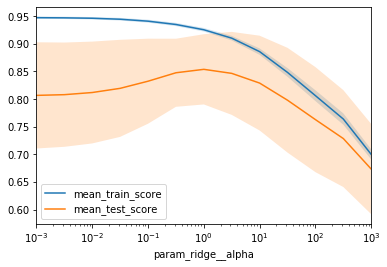

In [29]:
results.plot('param_ridge__alpha', 'mean_train_score')
results.plot('param_ridge__alpha', 'mean_test_score', ax=plt.gca())
plt.fill_between(results.param_ridge__alpha.astype(np.float),
                 results['mean_train_score'] + results['std_train_score'],
                 results['mean_train_score'] - results['std_train_score'], alpha=0.2)
plt.fill_between(results.param_ridge__alpha.astype(np.float),
                 results['mean_test_score'] + results['std_test_score'],
                 results['mean_test_score'] - results['std_test_score'], alpha=0.2)
plt.legend()
plt.xscale("log")

In [30]:
print(grid.best_params_)
print(grid.best_score_)

{'ridge__alpha': 1.0}
0.8537775160100842


In [31]:
grid.score(X_test, y_test)

0.8287527733077809

## Ridge Regression Coefficients

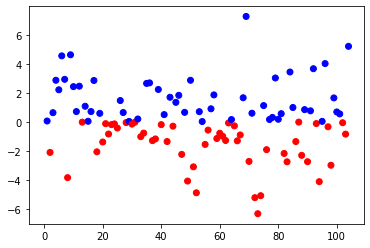

In [32]:
ridge = grid.best_estimator_
plt.scatter(range(X_train_poly.shape[1]), ridge["ridge"].coef_, c=np.sign(ridge["ridge"].coef_), cmap="bwr_r")

In [33]:
print(X_train_poly.shape)
np.sum(ridge["ridge"].coef_ != 0)

(379, 105)


104

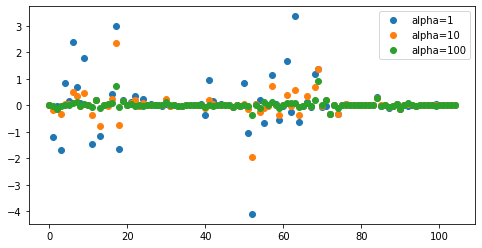

In [34]:
ridge100 = Ridge(alpha=100).fit(X_train_poly, y_train)
ridge10 = Ridge(alpha=10).fit(X_train_poly, y_train)
ridge1 = Ridge(alpha=1).fit(X_train_poly, y_train)
plt.figure(figsize=(8, 4))

plt.plot(ridge1.coef_, 'o', label="alpha=1")
plt.plot(ridge10.coef_, 'o', label="alpha=10")
plt.plot(ridge100.coef_, 'o', label="alpha=100")
plt.legend()

Text(0, 0.5, 'coefficient')

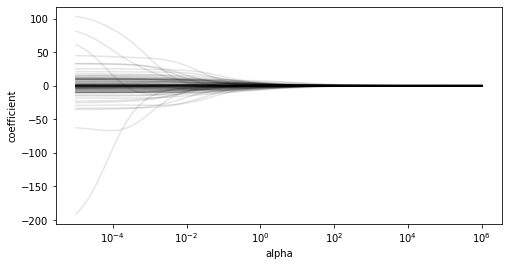

In [35]:
n_alphas = 200
alphas = np.logspace(-5, 6, n_alphas)
plt.figure(figsize=(8, 4))
coefs = []
for a in alphas:
    ridge = Ridge(alpha=a)
    ridge.fit(StandardScaler().fit_transform(X_train_poly), y_train)
    coefs.append(ridge.coef_)

plt.plot(alphas, coefs, c='k', alpha=.1)
plt.xscale("log")
plt.xlabel("alpha")
plt.ylabel("coefficient")

## Learning Curve

(-1, 1)

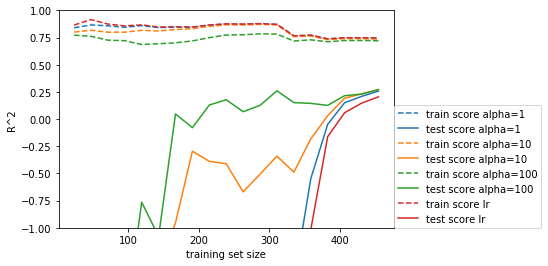

In [36]:
from sklearn.model_selection import learning_curve
def plot_learning_curve(est, name):
    train_set_size, train_scores, test_scores = learning_curve(est, X, y, cv=10, train_sizes=np.linspace(0, 1, 20)[1:])
    test_mean = test_scores.mean(axis=1)
    train_mean = train_scores.mean(axis=1)
    line, = plt.plot(train_set_size, train_mean, linestyle="--", label="train score {}".format(name))
    plt.plot(train_set_size, test_mean, label="test score {}".format(name),
             c=line.get_color())
    
plot_learning_curve(Ridge(alpha=1), "alpha=1")
plot_learning_curve(Ridge(alpha=10), "alpha=10")
plot_learning_curve(Ridge(alpha=100), "alpha=100")

plot_learning_curve(LinearRegression(), "lr")
plt.legend(loc=(1, 0))
plt.xlabel("training set size")
plt.ylabel("R^2")
plt.ylim(-1, 1)

## Grid-searching preprocessing steps and model parameters

In [37]:
pipe = make_pipeline(PolynomialFeatures(), StandardScaler(),Ridge())

In [38]:
param_grid = {'polynomialfeatures__degree': [1, 2, 3],
              'ridge__alpha': [0.001, 0.01, 0.1, 1, 10, 100]}

In [39]:
grid = GridSearchCV(pipe, param_grid=param_grid, cv=5, n_jobs=-1)
grid.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('polynomialfeatures',
                                        PolynomialFeatures(degree=2,
                                                           include_bias=True,
                                                           interaction_only=False,
                                                           order='C')),
                                       ('standardscaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('ridge',
                                        Ridge(alpha=1.0, copy_X=True,
                                              fit_intercept=True, max_iter=None,
                                              normalize=False,
                         

In [40]:
import pandas as pd
res = pd.pivot_table(pd.DataFrame(grid.cv_results_), values='mean_test_score', index='param_ridge__alpha', columns='param_polynomialfeatures__degree')
pd.set_option("display.precision",3)
res = res.set_index(res.index.values.round(4))

In [41]:
res

param_polynomialfeatures__degree      1      2      3
0.001                             0.716  0.798 -1.190
0.010                             0.716  0.806  0.463
0.100                             0.716  0.832  0.773
1.000                             0.716  0.855  0.845
10.000                            0.716  0.829  0.841
100.000                           0.696  0.760  0.811

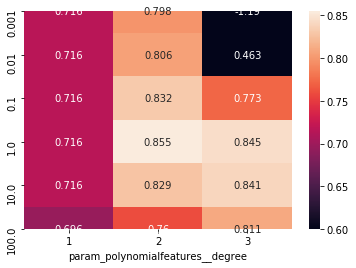

In [42]:
import seaborn as sns
sns.heatmap(res, annot=True, fmt=".3g", vmin=0.6)

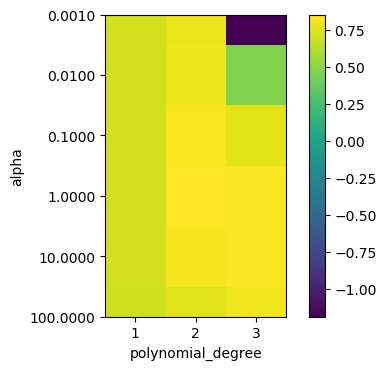

In [43]:
plt.figure(dpi=100)
plt.imshow(res) #, vmin=.70, vmax=.825)
plt.colorbar()
alphas = param_grid['ridge__alpha']
polynomial_degree = np.array(param_grid['polynomialfeatures__degree'])
plt.xlabel("polynomial_degree")
plt.ylabel("alpha")
plt.yticks(range(len(alphas)), ["{:.4f}".format(a) for a in alphas])
plt.xticks(range(len(polynomial_degree)), polynomial_degree);

In [44]:
print("Best parameters: {}".format(grid.best_params_))

Best parameters: {'polynomialfeatures__degree': 2, 'ridge__alpha': 1}


In [45]:
print("Test-set score: {:.2f}".format(grid.score(X_test, y_test)))

Test-set score: 0.83


In [46]:
param_grid = {'ridge__alpha': [0.001, 0.01, 0.1, 1, 10, 100]}
pipe = make_pipeline(StandardScaler(), Ridge())
grid = GridSearchCV(pipe, param_grid, cv=5)
grid.fit(X_train, y_train)
print("Score without poly features: {:.2f}".format(grid.score(X_test, y_test)))

Score without poly features: 0.68


# Lasso

In [47]:
pipe2 = make_pipeline(PolynomialFeatures(degree=2),StandardScaler(),Lasso(max_iter=1e6))

param_grid = {'lasso__alpha': np.logspace(-3, 0, 13)}

grid2 = GridSearchCV(pipe2, param_grid, cv=10, return_train_score=True)
grid2.fit(X_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('polynomialfeatures',
                                        PolynomialFeatures(degree=2,
                                                           include_bias=True,
                                                           interaction_only=False,
                                                           order='C')),
                                       ('standardscaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('lasso',
                                        Lasso(alpha=1.0, copy_X=True,
                                              fit_intercept=True,
                                              max_iter=1000000.0,
                                    

In [48]:
results = pd.DataFrame(grid2.cv_results_)
results

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0           1.832     2.094e-01        8.946e-04       1.620e-04   
1           1.128     1.521e-01        9.540e-04       2.032e-04   
2           0.605     1.796e-01        9.118e-04       1.539e-04   
3           0.388     1.333e-01        8.682e-04       1.553e-04   
4           0.178     3.358e-02        8.652e-04       1.733e-04   
5           0.102     2.152e-02        8.909e-04       1.534e-04   
6           0.063     1.900e-02        9.276e-04       1.875e-04   
7           0.024     1.769e-02        8.641e-04       1.181e-04   
8           0.007     1.152e-03        8.174e-04       1.692e-04   
9           0.005     8.196e-04        8.533e-04       1.581e-04   
10          0.004     7.068e-04        7.301e-04       1.049e-04   
11          0.003     5.625e-04        7.735e-04       1.653e-04   
12          0.002     4.839e-04        7.209e-04       1.465e-04   

   param_lasso__alpha                                   params  \
0               0.001                  {'lasso__alpha': 0.001}   
1             0.00178  {'lasso__alpha': 0.0017782794100389228}   
2             0.00316  {'lasso__alpha': 0.0031622776601683794}   
3             0.00562   {'lasso__alpha': 0.005623413251903491}   
4                0.01                   {'lasso__alpha': 0.01}   
5              0.0178    {'lasso__alpha': 0.01778279410038923}   
6              0.0316    {'lasso__alpha': 0.03162277660168379}   
7              0.0562    {'lasso__alpha': 0.05623413251903491}   
8                 0.1                    {'lasso__alpha': 0.1}   
9               0.178     {'lasso__alpha': 0.1778279410038923}   
10              0.316    {'lasso__alpha': 0.31622776601683794}   
11              0.562     {'lasso__alpha': 0.5623413251903491}   
12                  1                    {'lasso__alpha': 1.0}   

    split0_test_score  split1_test_score  split2_test_score  \
0               0.609              0.776              0.808   
1               0.622              0.779              0.797   
2               0.632              0.780              0.770   
3               0.663              0.780              0.732   
4               0.691              0.770              0.691   
5               0.762              0.773              0.634   
6               0.887              0.795              0.605   
7               0.882              0.812              0.558   
8               0.856              0.818              0.506   
9               0.839              0.806              0.491   
10              0.809              0.775              0.489   
11              0.791              0.759              0.487   
12              0.760              0.720              0.499   

    split3_test_score  ...  split2_train_score  split3_train_score  \
0               0.864  ...               0.944               0.944   
1               0.864  ...               0.941               0.942   
2               0.859  ...               0.935               0.937   
3               0.852  ...               0.930               0.932   
4               0.861  ...               0.922               0.926   
5               0.870  ...               0.913               0.914   
6               0.870  ...               0.904               0.899   
7               0.872  ...               0.890               0.875   
8               0.869  ...               0.873               0.848   
9               0.868  ...               0.853               0.824   
10              0.866  ...               0.825               0.792   
11              0.864  ...               0.804               0.765   
12              0.844  ...               0.766               0.732   

    split4_train_score  split5_train_score  split6_train_score  \
0                0.940               0.944               0.941   
1                0.938               0.942               0.938   
2                0.932               0.936               0.933  

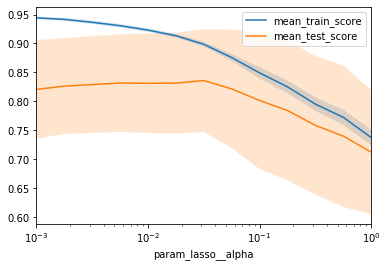

In [49]:
results.plot('param_lasso__alpha', 'mean_train_score')
results.plot('param_lasso__alpha', 'mean_test_score', ax=plt.gca())
plt.fill_between(results.param_lasso__alpha.astype(np.float),
                 results['mean_train_score'] + results['std_train_score'],
                 results['mean_train_score'] - results['std_train_score'], alpha=0.2)
plt.fill_between(results.param_lasso__alpha.astype(np.float),
                 results['mean_test_score'] + results['std_test_score'],
                 results['mean_test_score'] - results['std_test_score'], alpha=0.2)
plt.legend()
plt.xscale("log")

In [50]:
print(grid2.best_params_)
print(grid2.best_score_)

{'lasso__alpha': 0.03162277660168379}
0.8359714417058427


In [51]:
grid2.score(X_test, y_test)

0.8130405334946651

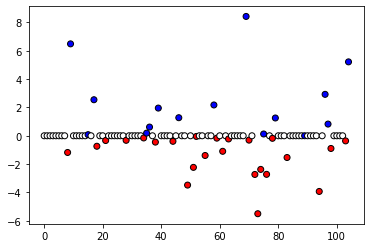

In [52]:
lasso = grid2.best_estimator_
plt.scatter(range(X_train_poly.shape[1]), lasso['lasso'].coef_, c=np.sign(lasso['lasso'].coef_), cmap="bwr_r", edgecolor='k')

In [53]:
print(X_train_poly.shape)
np.sum(lasso['lasso'].coef_ != 0)

(379, 105)


39

In [54]:
from sklearn.linear_model import lars_path
# lars_path computes the exact regularization path which is piecewise linear.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
alphas, active, coefs = lars_path(X_train, y_train, eps=0.00001, method="lasso")

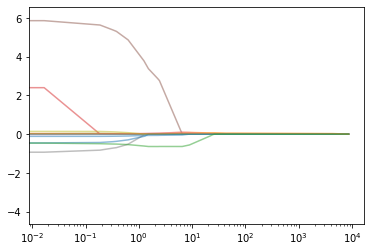

In [55]:
plt.plot(alphas, coefs.T, alpha=.5)
plt.xscale("log")

# Elastic Net

In [56]:
from sklearn.linear_model import ElasticNet

In [57]:
pipe3 = make_pipeline(PolynomialFeatures(degree=2),StandardScaler(),ElasticNet(max_iter=100000))

param_grid = {'elasticnet__alpha': np.logspace(-3, -1, 5), 'elasticnet__l1_ratio': [0.01, .1, .5, .9, 1]}

grid3 = GridSearchCV(pipe3, param_grid, cv=10, return_train_score=True)
grid3.fit(X_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('polynomialfeatures',
                                        PolynomialFeatures(degree=2,
                                                           include_bias=True,
                                                           interaction_only=False,
                                                           order='C')),
                                       ('standardscaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('elasticnet',
                                        ElasticNet(alpha=1.0, copy_X=True,
                                                   fit_intercept=True,
                                                   l1_ratio=0.5,
                      

In [58]:
pd.DataFrame(grid3.cv_results_).columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_elasticnet__alpha', 'param_elasticnet__l1_ratio', 'params',
       'split0_test_score', 'split1_test_score', 'split2_test_score',
       'split3_test_score', 'split4_test_score', 'split5_test_score',
       'split6_test_score', 'split7_test_score', 'split8_test_score',
       'split9_test_score', 'mean_test_score', 'std_test_score',
       'rank_test_score', 'split0_train_score', 'split1_train_score',
       'split2_train_score', 'split3_train_score', 'split4_train_score',
       'split5_train_score', 'split6_train_score', 'split7_train_score',
       'split8_train_score', 'split9_train_score', 'mean_train_score',
       'std_train_score'],
      dtype='object')

In [59]:
import pandas as pd
res = pd.pivot_table(pd.DataFrame(grid3.cv_results_), values='mean_test_score', index='param_elasticnet__alpha', columns='param_elasticnet__l1_ratio')
pd.set_option("display.precision",3)
res = res.set_index(res.index.values.round(4))

In [60]:
res

param_elasticnet__l1_ratio   0.01   0.10   0.50   0.90   1.00
0.001                       0.848  0.847  0.841  0.826  0.821
0.003                       0.854  0.854  0.852  0.840  0.829
0.010                       0.846  0.846  0.846  0.843  0.831
0.032                       0.827  0.828  0.830  0.833  0.836
0.100                       0.795  0.795  0.796  0.801  0.801

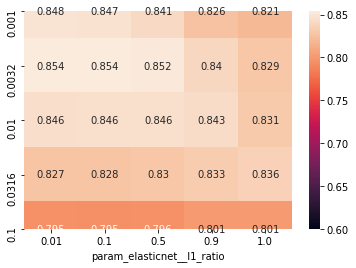

In [61]:
import seaborn as sns
sns.heatmap(res, annot=True, fmt=".3g", vmin=0.6)

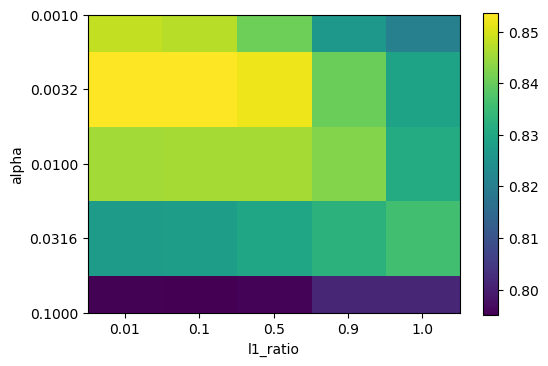

In [62]:
plt.figure(dpi=100)
plt.imshow(res) #, vmin=.70, vmax=.825)
plt.colorbar()
alphas = param_grid['elasticnet__alpha']
l1_ratio = np.array(param_grid['elasticnet__l1_ratio'])
plt.xlabel("l1_ratio")
plt.ylabel("alpha")
plt.yticks(range(len(alphas)), ["{:.4f}".format(a) for a in alphas])
plt.xticks(range(len(l1_ratio)), l1_ratio);

In [63]:
print(grid3.best_params_)
print(grid3.best_score_)

{'elasticnet__alpha': 0.0031622776601683794, 'elasticnet__l1_ratio': 0.01}
0.8536672691530309


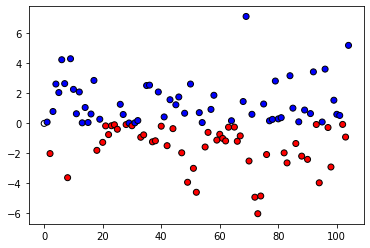

In [64]:
en = grid3.best_estimator_
plt.scatter(range(X_train_poly.shape[1]), en['elasticnet'].coef_, c=np.sign(en['elasticnet'].coef_), cmap="bwr_r", edgecolor='k')

In [65]:
print(X_train_poly.shape)
np.sum(en['elasticnet'].coef_ != 0)

(379, 105)


104

In [66]:
grid3.score(X_test, y_test)

0.8295292473167917

# Random Forest Regressor

In [67]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100).fit(X_train, y_train)
print("Score without interactions: {:.3f}".format(
    rf.score(X_test, y_test)))
rf = RandomForestRegressor(n_estimators=100).fit(X_train_poly, y_train)
print("Score with interactions: {:.3f}".format(rf.score(X_test_poly, y_test)))

Score without interactions: 0.840
Score with interactions: 0.853
